In [8]:
%load_ext autoreload
%autoreload 2
import waffles
import numpy as np
import json
import shutil 
from tqdm import tqdm

from waffles.input_output.hdf5_structured import load_structured_waveformset
from waffles.data_classes.Waveform import Waveform
from waffles.data_classes.WaveformSet import WaveformSet
from waffles.data_classes.BasicWfAna import BasicWfAna
from waffles.data_classes.IPDict import IPDict
from waffles.data_classes.UniqueChannel import UniqueChannel
from waffles.data_classes.ChannelWsGrid import ChannelWsGrid
from waffles.utils.baseline.baseline import SBaseline
from waffles.np02_utils.AutoMap import generate_ChannelMap, dict_uniqch_to_module, dict_module_to_uniqch
from waffles.np02_utils.PlotUtils import np02_gen_grids, plot_grid, plot_detectors, genhist, fithist, runBasicWfAnaNP02

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dettype = "membrane"




## Only change if necessary
datadir = f"/eos/experiment/neutplatform/protodune/experiments/ProtoDUNE-VD/commissioning/"
det = "VD_Cathode_PDS" if dettype == "cathode" else "VD_Membrane_PDS"
endpoint = 106 if dettype == "cathode" else 107

# Way to low... keep scrollng
dletter = dettype.upper()[0] # C or M...
group1 = [ f"{dletter}{detnum}({chnum})" for detnum in range(1, 3) for chnum in range(1,3) ]
group2 = [ f"{dletter}{detnum}({chnum})" for detnum in range(3, 5) for chnum in range(1,3) ]
group3 = [ f"{dletter}{detnum}({chnum})" for detnum in range(5, 7) for chnum in range(1,3) ]
group4 = [ f"{dletter}{detnum}({chnum})" for detnum in range(7, 9) for chnum in range(1,3) ]
groupLow = group1+group2
groupHig = group3+group4
groupall = group1+group2+group3+group4

In [ ]:
from glob import glob
import copy
def open_processed(run, dettype, output_dir, channels = None, endpoints=None, nwaveforms=None, mergefiles = False, verbose=True):
    """
    Open the processed waveform set for a given run and detector type.
    """
    try: 
        wfset = load_structured_waveformset(
            f"{output_dir}/processed/run{run:0d}_{dettype}/processed_merged_run{run:06d}_structured_{dettype}.hdf5",
            max_to_load=nwaveforms,
            channels_filter=channels,
            endpoint_filter=endpoints
        )
    except:
        files = glob(f"{output_dir}/processed/run{run:06d}_{dettype}/processed_*_run{run:06d}_*_{dettype}.hdf5")
        if verbose:
            print("List of files found:")
            print(files)
        if not mergefiles or len(files)==1:
            files = files[0]
            wfset = load_structured_waveformset(files, max_to_load=nwaveforms, channels_filter=channels, endpoint_filter=endpoints, verbose=verbose)
        else: 
            wfset = load_structured_waveformset(files[0], max_to_load=nwaveforms, channels_filter= channels, endpoint_filter=endpoints, verbose=verbose)
            for f in files[1:]:
                tmpwf = load_structured_waveformset(f, max_to_load=nwaveforms, verbose=False)
                wfset.merge(copy.deepcopy(tmpwf))
    return wfset

In [ ]:
run_to_module = {

    "membrane" : {
        38410 : ["M3(1)", "M3(2)", "M4(1)", "M4(2)"],
        38400 : ["M5(1)"],
        38399 : ["M5(2)"],
        38398 : ["M6(1)", "M6(2)"],
        38401 : ["M7(1)", "M7(2)"],
        38402 : ["M8(1)", "M8(2)"],
    },
    "cathode" : {
       38406  : ["C1(1)", "C1(2)" ],
       38408  : ["C2(1)", "C2(2)"],
       38403  : ["C3(1)", "C3(2)"],
       38407  : ["C4(1)", "C4(2)"],
       38405  : ["C5(1)", "C5(2)"],
       38412  : ["C6(1)"],
       38411  : ["C6(2)"],
       38410  : ["C7(1)", "C7(2)"],
       38409  : ["C8(1)", "C8(2)"],
    }

}
run_to_module = run_to_module[dettype]

run_to_unich = { r: [ dict_module_to_uniqch[m].channel for m in modules ] for r, modules in run_to_module.items() }
channels = [ x for v in run_to_unich.values() for x in v]

In [ ]:
import copy
import time
def select_channels(waveform: Waveform, channels: list) -> bool:
    if waveform.channel not in channels:
        return False
    return True
def create_wfset(run_to_unich, endpoint):

    nwaveforms = None
    wfset_full = None
    for run, channels in run_to_unich.items():
        wfset = open_processed(run, dettype, datadir, channels, [endpoint], nwaveforms=nwaveforms, verbose=True)
        # wfset = WaveformSet.from_filtered_WaveformSet(wfset, select_channels, channels)
        if wfset_full is None:
            wfset_full = copy.deepcopy(wfset)
        else:
            wfset_full.merge(copy.deepcopy(wfset))
        print(f"Loaded run {run}")
    return wfset_full
    
start = time.time()
wfset_full = create_wfset(run_to_unich, endpoint)
end = time.time()
print(end - start)

multigauss_iminuit
38410, 5.89, 2728.64, 463.45, 538.43, 0.49
multigauss_iminuit
38410, 5.58, 2722.01, 488.12, 595.12, 1.94
multigauss_iminuit
38410, 5.94, 2109.27, 354.83, 427.19, 2.27
multigauss_iminuit
38410, 5.83, 2009.52, 344.65, 411.95, 4.00


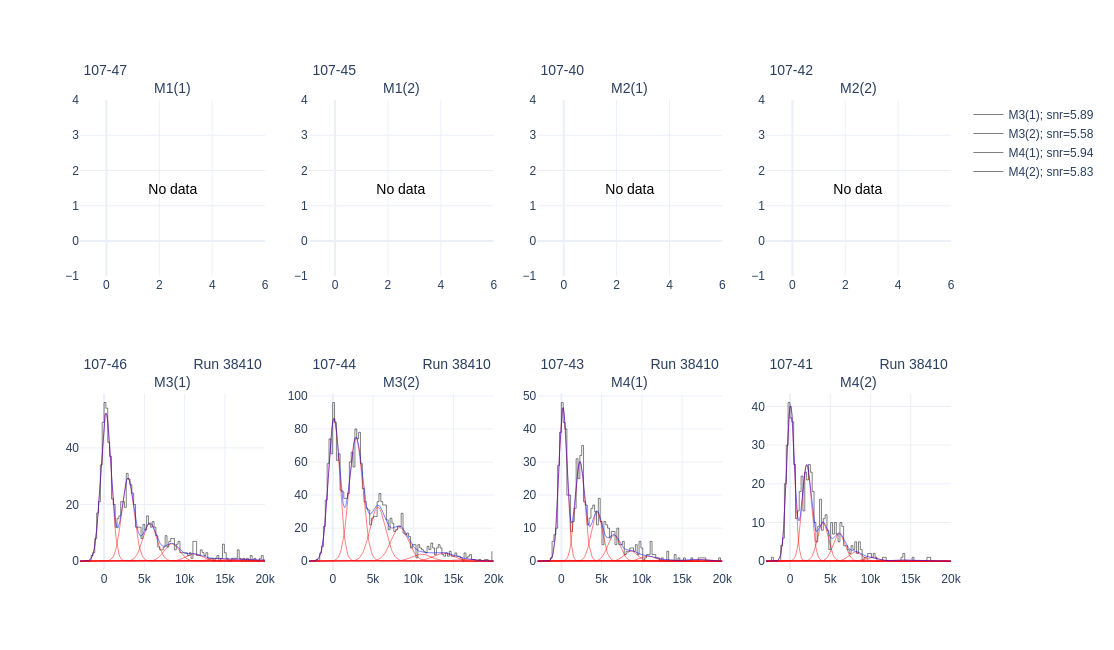

multigauss_iminuit
38400, 5.37, 4364.84, 813.44, 988.23, 2.37
multigauss_iminuit
38399, 5.88, 4194.05, 713.65, 965.16, 2.15
multigauss_iminuit
38398, 5.38, 2802.04, 520.93, 630.82, 3.92
multigauss_iminuit
38398, 6.11, 2739.12, 448.61, 582.83, 3.25
multigauss_iminuit
38401, 7.52, 3209.22, 426.96, 511.88, 2.46
multigauss_iminuit
38401, 8.70, 3147.57, 361.95, 478.67, 2.43
multigauss_iminuit
38402, 5.42, 3848.02, 710.57, 789.91, 3.31
multigauss_iminuit
38402, 5.49, 3790.71, 690.20, 791.95, 3.43


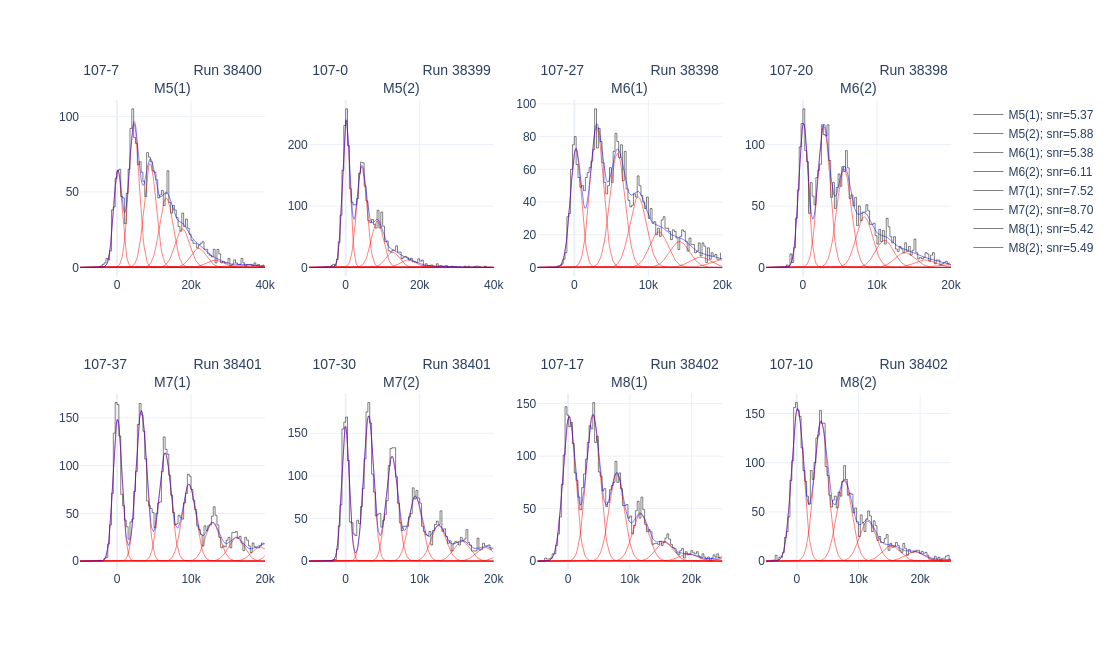

In [13]:
from pathlib import Path
from datetime import datetime 

histargs = dict(    
    doprocess = False,
    dofit = True,
    show_progress = True,
    fitmultigauss = True,
    # verbosemultigauss = True
)
setupargs=dict(
# default 1300x1300
    width=1300,
    height=650,
    showplots=True
)
htmlname = None

# timenow = datetime.now().strftime('%Y%m%d_%H%M%S') 
# htmlname = Path(f"./calibration_{dettype}_{timenow}.html")

# # Any detector can be processed alone if all were processed already
# detector=group1
# plot_detectors(wfset_full, detector, plot_function=fithist, html=None, wf_func=histargs)
  
# detector=["C6(1)", "C6(2)"]
# plot_detectors(wfset_full, detector, plot_function=fithist, html=None, wf_func=histargs)
detector=groupLow
plot_detectors(wfset_full, detector, plot_function=fithist, html=htmlname, wf_func=histargs, **setupargs)
detector=groupHig
plot_detectors(wfset_full, detector, plot_function=fithist, html=htmlname, wf_func=histargs, **setupargs)

In [ ]:
argsheat = dict(
    mode="heatmap",
    analysis_label="std",
    adc_range_above_baseline=200,
    adc_range_below_baseline=-50,
    adc_bins=125,
    time_bins=wfset_full.points_per_wf//2,
    filtering=36,
    share_y_scale=False,
    share_x_scale=True,
    wfs_per_axes=5000,
    zlog=True,
    width=1300,
    higth=650
)
detector=groupLow
plot_detectors(wfset_full, detector, **argsheat)

detector=groupHig
plot_detectors(wfset_full, detector, **argsheat)
